# <b/><font color='green'><center> Fraudlent Transactions Predictions</center></font>

### <b>Business Context:</b> 

This case requires trainees to develop a model for predicting fraudulent transactions for a
financial company and use insights from the model to develop an actionable plan. Data for the
case is available in CSV format having 6362620 rows and 10 columns.

Candidates can use whatever method they wish to develop their machine learning model.
Following usual model development procedures, the model would be estimated on the
calibration data and tested on the validation data. This case requires both statistical analysis and
creativity/judgment. We recommend you spend time on both fine-tuning and interpreting the
results of your machine learning model.

### <b>Task to be done:</b>
Your task is to execute the process for proactive detection of fraud while answering following
questions.
1. Data cleaning including missing values, outliers and multi-collinearity.
2. Describe your fraud detection model in elaboration.
3. How did you select variables to be included in the model?
4. Demonstrate the performance of the model by using best set of tools.
5. What are the key factors that predict fraudulent customer?
6. Do these factors make sense? If yes, How? If not, How not?
7. What kind of prevention should be adopted while company update its infrastructure?
8. Assuming these actions have been implemented, how would you determine if they work?

## <b/> Importing Libraries

In [72]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 8]

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

import itertools
from collections import Counter

from statsmodels.stats.outliers_influence import variance_inflation_factor

## <b/> Loading the Dataset 

In [47]:
df = pd.read_csv('Fraud.csv')
df.head(15)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


## <b/> Data Preprocessing

In [6]:
df.shape

(6362620, 11)

In [7]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [9]:
df.duplicated().sum()

0

## <b/> Exploratory Data Analysis

In [10]:
# Number of fraud and legitimate transactions
fraud = len(df[df['isFraud'] == 1])
legit = len(df[df['isFraud'] == 0])

print("Number of Fraud transactions: ", fraud)
print("Number of Legit transactions: ", legit)

Number of Fraud transactions:  8213
Number of Legit transactions:  6354407


- These results prove that this is a highly unbalanced data as Number of Fraud transactions is 8213 and Number of Legit transactions= 6354407. So Random Forest, Decision Trees, XGBoost are good methods for the highly unbalanced data.

In [11]:
# Visualzing the Merchants Data
X = df[df['nameDest'].str.contains('M')]
X.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0
5,1,PAYMENT,7817.71,C90045638,53860.0,46042.29,M573487274,0.0,0.0,0,0
6,1,PAYMENT,7107.77,C154988899,183195.0,176087.23,M408069119,0.0,0.0,0,0


- There is no information for oldbalanceDest and newbalanceDest for the Merchants.

In [15]:
# checking correlation
corr = df.corr(numeric_only=True)
corr

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.000000,0.022373,-0.010058,-0.010299,0.027665,0.025888,0.031578,0.003277
amount,0.022373,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688,0.012295
oldbalanceOrg,-0.010058,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154,0.003835
newbalanceOrig,-0.010299,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148,0.003776
oldbalanceDest,0.027665,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885,-0.000513
newbalanceDest,0.025888,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535,-0.000529
isFraud,0.031578,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000,0.044109
isFlaggedFraud,0.003277,0.012295,0.003835,0.003776,-0.000513,-0.000529,0.044109,1.000000


<Axes: >

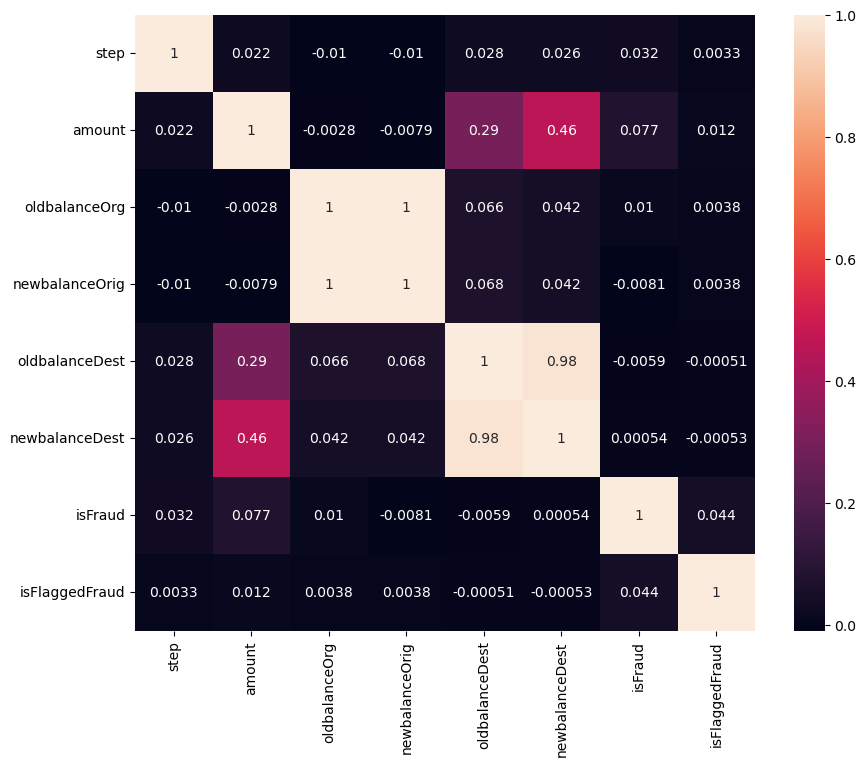

In [28]:
# plotting correlation using heatmap
sns.heatmap(data=corr, annot=True)

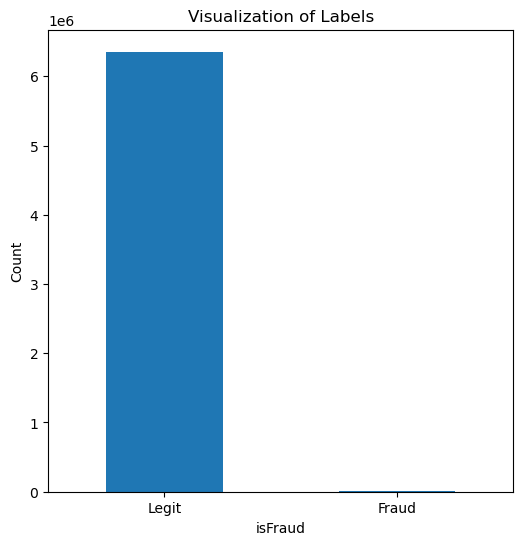

In [21]:
# plotting bar chart for legit & fraud transaction
plt.figure(figsize=(6,6))
labels = ["Legit", "Fraud"]
count_classes = df.value_counts(df['isFraud'], sort= True)
count_classes.plot(kind = "bar", rot = 0)
plt.title("Visualization of Labels")
plt.ylabel("Count")
plt.xticks(range(2), labels)
plt.show()

# <b/> Feature Engineering

In [48]:
# create a copy of the original dataframe
df_new = df.copy()
df_new.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


## <b/> Label Encoding

In [49]:
# check object datatypes
objList = df_new.select_dtypes(include = "object").columns
print(objList)

Index(['type', 'nameOrig', 'nameDest'], dtype='object')


- There are 3 attributes with object datatype. We need to label encode these to check multicollinearity.

In [50]:
# encode the objects
le = LabelEncoder()

for f in objList:
    df_new[f] = le.fit_transform(df_new[f].astype(str))

print(df_new.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            int64  
 2   amount          float64
 3   nameOrig        int64  
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        int64  
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(6)
memory usage: 534.0 MB
None


In [51]:
df_new.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,757869,170136.0,160296.36,1662094,0.0,0.0,0,0
1,1,3,1864.28,2188998,21249.0,19384.72,1733924,0.0,0.0,0,0
2,1,4,181.00,1002156,181.0,0.00,439685,0.0,0.0,1,0
3,1,1,181.00,5828262,181.0,0.00,391696,21182.0,0.0,1,0
4,1,3,11668.14,3445981,41554.0,29885.86,828919,0.0,0.0,0,0


## <b/> Multicollinearity

In [52]:
# function to find the variation inflation factor
def cal_vif(df):
    vif = pd.DataFrame()
    vif['variables'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
    return vif

cal_vif(df_new)

,variables,VIF
0,step,2.791610
1,type,4.467405
2,amount,4.149312
3,nameOrig,2.764234
4,oldbalanceOrg,576.803777
5,newbalanceOrig,582.709128
6,nameDest,3.300975
7,oldbalanceDest,73.349937
8,newbalanceDest,85.005614
9,isFraud,1.195305


- We can see that oldbalanceOrg and newbalanceOrig have too high VIF thus they are highly correlated. Similarly oldbalanceDest and newbalanceDest. Also nameDest is connected to nameOrig.

- Thus combine these pairs of collinear attributes and drop the individual ones.

In [53]:
# creating new features to capture the change in balances and transaction paths
df_new['Actual_amount_orig'] = df_new.apply(lambda x: x['oldbalanceOrg'] - x['newbalanceOrig'],axis=1)
df_new['Actual_amount_dest'] = df_new.apply(lambda x: x['oldbalanceDest'] - x['newbalanceDest'],axis=1)
df_new['TransactionPath'] = df_new.apply(lambda x: x['nameOrig'] + x['nameDest'],axis=1)

#Dropping columns
df_new = df_new.drop(['oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest','step','nameOrig','nameDest'],axis=1)

cal_vif(df_new)

,variables,VIF
0,type,2.687803
1,amount,3.818902
2,isFraud,1.184479
3,isFlaggedFraud,1.002546
4,Actual_amount_orig,1.307910
5,Actual_amount_dest,3.754335
6,TransactionPath,2.677167


<Axes: >

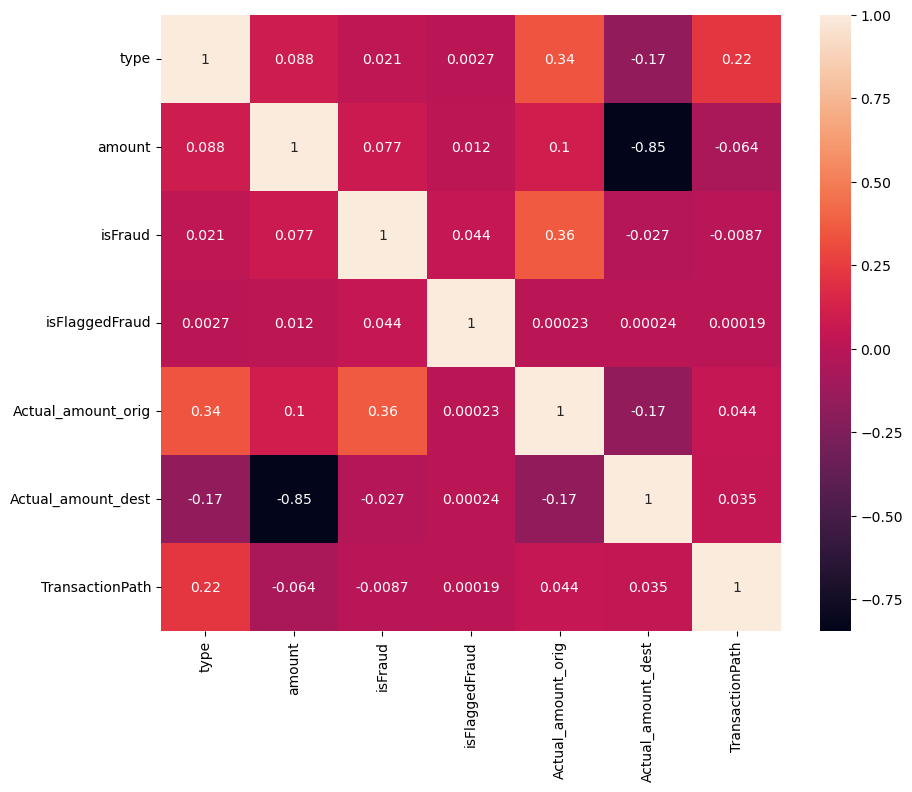

In [55]:
# new correlation heatmap
corr=df_new.corr()

sns.heatmap(corr,annot=True)

<b/> How did you select variables to be included in the model?
   
- Using the VIF values and correlation heatmap. We just need to check if there are any two attributes highly correlated to each other and then drop the one which is less correlated to the isFraud Attribute.

# <b/> ML Model Building

## <b/> Scaling the Data

In [58]:
# scale the dataset
scaler = StandardScaler()
df_new["NormalizedAmount"] = scaler.fit_transform(df_new["amount"].values.reshape(-1, 1))
df_new.drop(["amount"], inplace= True, axis= 1)

Y = df_new["isFraud"]
X = df_new.drop(["isFraud"], axis= 1)

- I did not normalize the complete dataset because it may lead to decrease in accuracy of model.



## <b/> Splitting the Data

In [59]:
# split the dataset for training and testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.3, random_state= 42)

print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)

Shape of X_train:  (4453834, 6)
Shape of X_test:  (1908786, 6)


## <b/> Model Training

In [60]:
# Decision Tree
dtc = DecisionTreeClassifier()
dtc.fit(X_train, Y_train)

Y_pred_dt = dtc.predict(X_test)
dtc_score = dtc.score(X_test, Y_test) * 100

In [61]:
# Random Forest
rfc = RandomForestClassifier(n_estimators= 100)
rfc.fit(X_train, Y_train)

Y_pred_rf = rfc.predict(X_test)
rfc_score = rfc.score(X_test, Y_test) * 100

In [63]:
# XGBoost
xgb = XGBClassifier()
xgb.fit(X_train, Y_train)

Y_pred_xgb = xgb.predict(X_test)
xgb_score = xgb.score(X_test, Y_test) * 100

In [64]:
print("Decision Tree Score: ", dtc_score)
print("Random Forest Score: ", rfc_score)
print("XGBoost Score      : ", xgb_score)

Decision Tree Score:  99.92351159323256
Random Forest Score:  99.95861243743406
XGBoost Score      :  99.95992217042665


- XGBoost is better than Decision Tree and Random Forest Classifier.

In [65]:
# key terms of Confusion Matrix - DT

print("TP,FP,TN,FN - Decision Tree")
tn, fp, fn, tp = confusion_matrix(Y_test, Y_pred_dt).ravel()
print(f'True Positives: {tp}')
print(f'False Positives: {fp}')
print(f'True Negatives: {tn}')
print(f'False Negatives: {fn}')

print("----------------------------------------------------------------------------------------")

# key terms of Confusion Matrix - RF

print("TP,FP,TN,FN - Random Forest")
tn, fp, fn, tp = confusion_matrix(Y_test, Y_pred_rf).ravel()
print(f'True Positives: {tp}')
print(f'False Positives: {fp}')
print(f'True Negatives: {tn}')
print(f'False Negatives: {fn}')

print("----------------------------------------------------------------------------------------")

# key terms of Confusion Matrix - XGB

print("TP,FP,TN,FN - XGBoost")
tn, fp, fn, tp = confusion_matrix(Y_test, Y_pred_xgb).ravel()
print(f'True Positives: {tp}')
print(f'False Positives: {fp}')
print(f'True Negatives: {tn}')
print(f'False Negatives: {fn}')

TP,FP,TN,FN - Decision Tree
True Positives: 1716
False Positives: 741
True Negatives: 1905610
False Negatives: 719
----------------------------------------------------------------------------------------
TP,FP,TN,FN - Random Forest
True Positives: 1709
False Positives: 64
True Negatives: 1906287
False Negatives: 726
----------------------------------------------------------------------------------------
TP,FP,TN,FN - XGBoost
True Positives: 1711
False Positives: 41
True Negatives: 1906310
False Negatives: 724


- TP(Decision Tree) ~ TP(Random Forest) ~ TP(XGBoost) so no competetion here.
- FP(Decision Tree) >> FP(Random Forest) >> FP(XGBoost) - XGBoost has an edge here.
- TN(Decision Tree) < TN(Random Forest) < TN(XGBoost) - Random Forest is better here too
- FN(Decision Tree) ~ FN(Random Forest) ~ FN(XGBoost)

- XGBoost Classifier works more good in this scenario.

In [67]:
# confusion matrix - DT

confusion_matrix_dt = confusion_matrix(Y_test, Y_pred_dt.round())
print("Confusion Matrix - Decision Tree")
print(confusion_matrix_dt,)

print("----------------------------------------------------------------------------------------")

# confusion matrix - RF

confusion_matrix_rf = confusion_matrix(Y_test, Y_pred_rf.round())
print("Confusion Matrix - Random Forest")
print(confusion_matrix_rf)

print("----------------------------------------------------------------------------------------")

# confusion matrix - XGB

confusion_matrix_xgb = confusion_matrix(Y_test, Y_pred_xgb.round())
print('Confusion Matrix - XGBoost')
print(confusion_matrix_xgb)

Confusion Matrix - Decision Tree
[[1905610     741]
 [    719    1716]]
----------------------------------------------------------------------------------------
Confusion Matrix - Random Forest
[[1906287      64]
 [    726    1709]]
----------------------------------------------------------------------------------------
Confusion Matrix - XGBoost
[[1906310      41]
 [    724    1711]]


In [68]:
# classification report - DT

classification_report_dt = classification_report(Y_test, Y_pred_dt)
print("Classification Report - Decision Tree")
print(classification_report_dt)

print("----------------------------------------------------------------------------------------")

# classification report - RF

classification_report_rf = classification_report(Y_test, Y_pred_rf)
print("Classification Report - Random Forest")
print(classification_report_rf)

print("----------------------------------------------------------------------------------------")

# classification report - XGB

classification_report_xgb = classification_report(Y_test, Y_pred_xgb)
print("Classification Report - XGBoost")
print(classification_report_xgb)

Classification Report - Decision Tree
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.70      0.70      0.70      2435

    accuracy                           1.00   1908786
   macro avg       0.85      0.85      0.85   1908786
weighted avg       1.00      1.00      1.00   1908786

----------------------------------------------------------------------------------------
Classification Report - Random Forest
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.96      0.70      0.81      2435

    accuracy                           1.00   1908786
   macro avg       0.98      0.85      0.91   1908786
weighted avg       1.00      1.00      1.00   1908786

----------------------------------------------------------------------------------------
Classification Report - XGBoost
              precision    recall  f1-score   support

     

- With Such a good precision and hence F1-Score, XGBoost comes out to be better as expected.

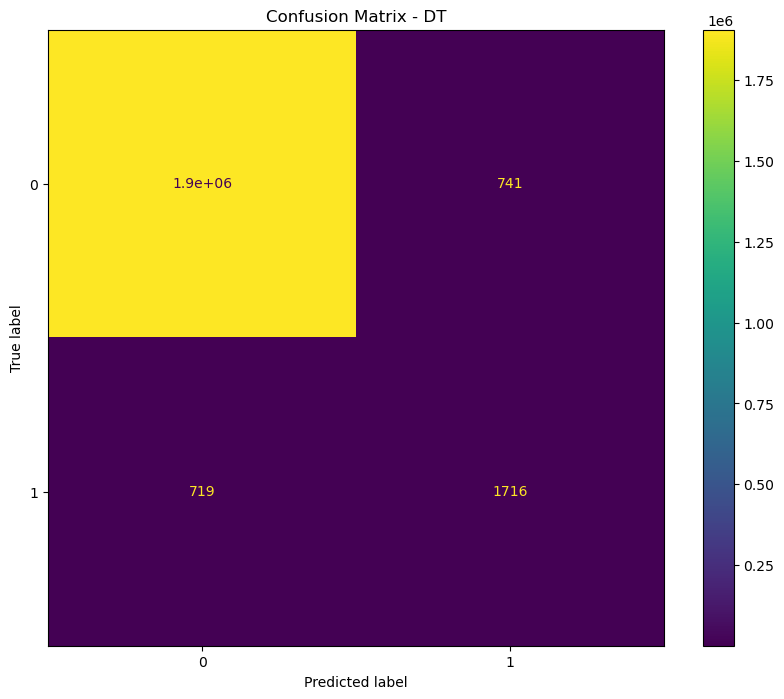

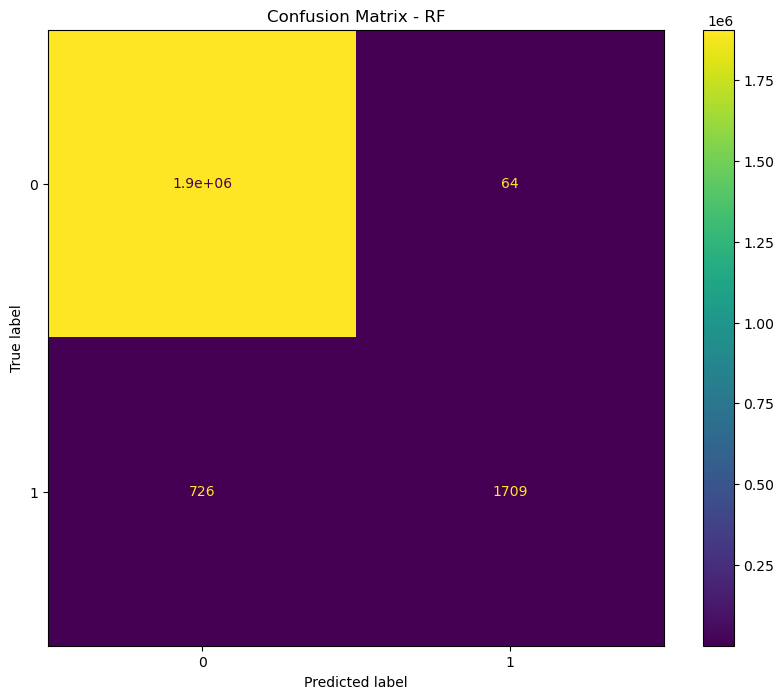

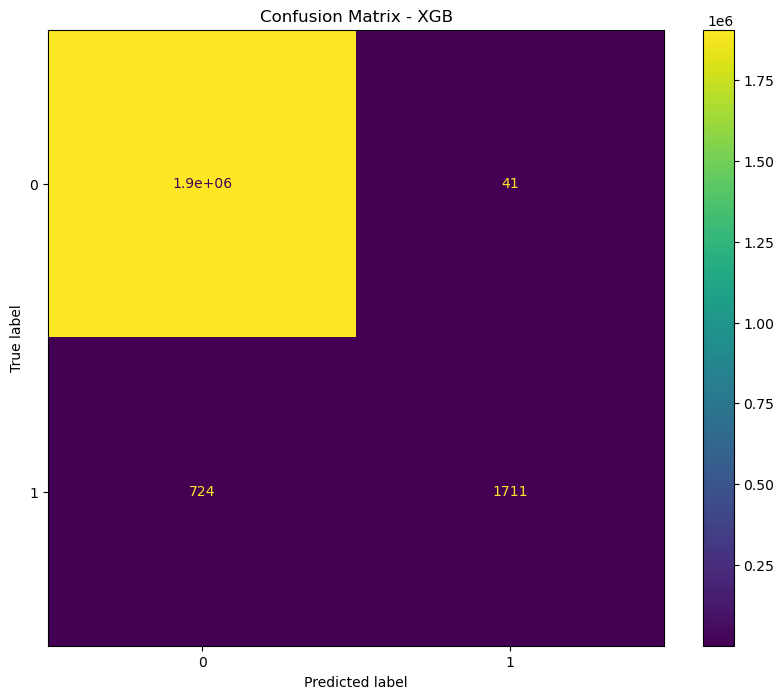

In [69]:
# visualising confusion matrix - DT

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_dt)
disp.plot()
plt.title('Confusion Matrix - DT')
plt.show()

# visualising confusion matrix - RF
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_rf)
disp.plot()
plt.title('Confusion Matrix - RF')
plt.show()

# visualising confusion matrix - XGB
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_xgb)
disp.plot()
plt.title('Confusion Matrix - XGB')
plt.show()

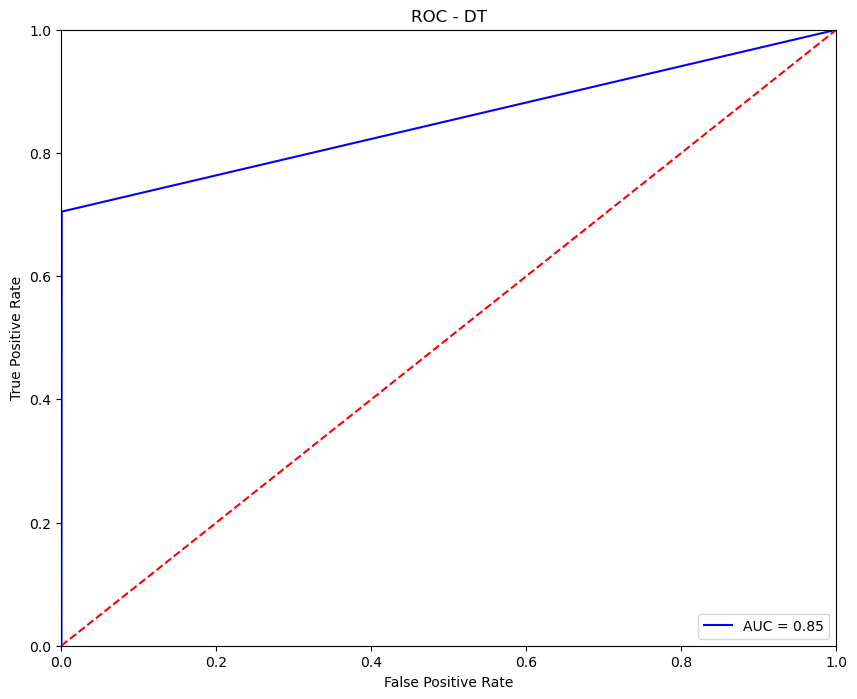

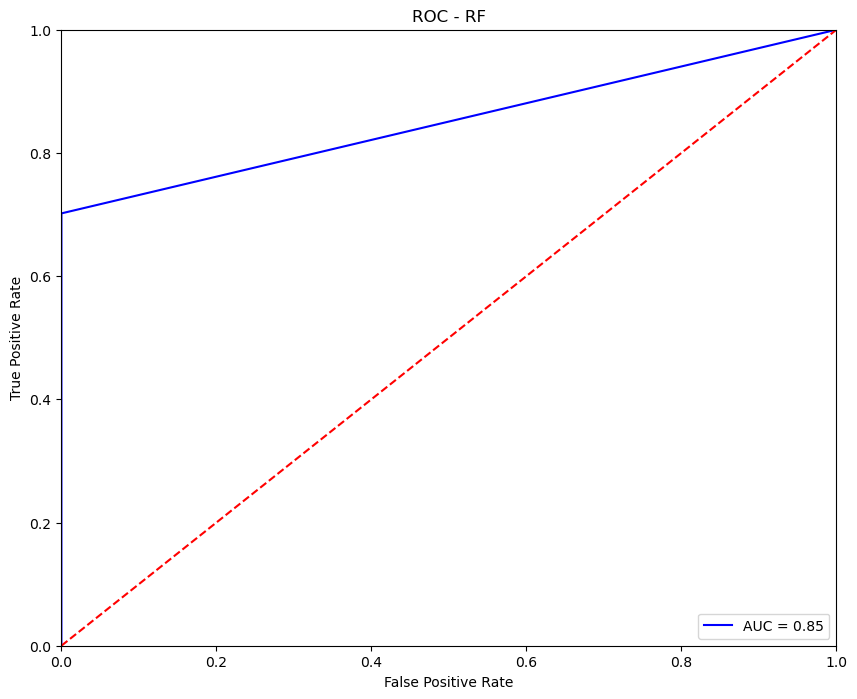

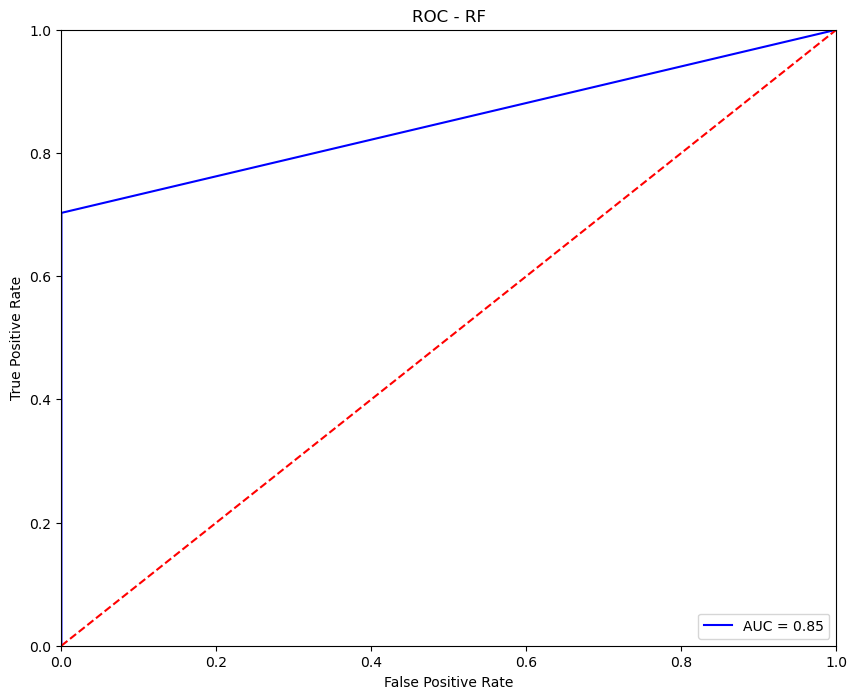

In [73]:
# AUC ROC - DT
# calculate the fpr and tpr for all thresholds of the classification

fpr, tpr, threshold = metrics.roc_curve(Y_test, Y_pred_dt)
roc_auc = metrics.auc(fpr, tpr)

plt.title('ROC - DT')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# AUC ROC - RF
# calculate the fpr and tpr for all thresholds of the classification

fpr, tpr, threshold = metrics.roc_curve(Y_test, Y_pred_rf)
roc_auc = metrics.auc(fpr, tpr)

plt.title('ROC - RF')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# AUC ROC - XGB
# calculate the fpr and tpr for all thresholds of the classification

fpr, tpr, threshold = metrics.roc_curve(Y_test, Y_pred_xgb)
roc_auc = metrics.auc(fpr, tpr)

plt.title('ROC - RF')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

- The AUC ROC for Decision Tree, Random Forest and XGBoost is equal, so all these three models are pretty good.

## <b/> Conclusion:
We have seen that Accuracy of Random Forest, Decision Tree and XGBoost is equal, although the precision of XGBoost is more. In a fraud detection model, Precision is highly important because rather than predicting normal transactions correctly we want to know about the Fraud transactions to be predicted correctly and Legit to be left off. If either of the 2 reasons are not fulfiiled we may catch the innocent and leave the culprit.

- This is also one of the reason why Ensemble techniques are used unstead of other algorithms.

- Also the reason I have chosen this model is because of highly unbalanced dataset (Legit: Fraud :: 6354407:8213). XGBoost builds a predictive model by combining the predictions of multiple individual models, often decision trees, in an iterative manner.


- Models like Bagging, ANN, and Logistic Regression may give good accuracy but they won't give good precision and recall values.

<b/> What are the key factors that predict fraudulent customer?

- Transaction amount.
- Changes in balances.
- Transaction type.
- Whether the source of payment request is secured or not?
- Is the receiver organization is legitimate or not?

<b/> Do These Factors Make Sense? If Yes, How? If Not, How Not?

Yes, these factors make sense:
- Transaction Amount: Large or unusual amounts can indicate fraud.
- Balance Changes: Significant changes in balances might signal unauthorized transactions.
- Transaction Type: Certain transaction types might be more prone to fraud (e.g., international transfers).

<b/> What Kind of Prevention Should Be Adopted While Company Update Its Infrastructure?
- Real-Time Monitoring
- Multi-Factor Authentication (MFA)
- User Behavior Analytics
- Regular Audits
- Data Encryption

<b/> Assuming These Actions Have Been Implemented, How Would You Determine If They Work?

To determine if the actions are effective:

- Monitor Fraud Rates: Track the fraud rates before and after implementation.
- User Feedback: Gather feedback from users on the new security measures.
- Performance Metrics: Continuously monitor model performance metrics (accuracy, precision, recall, ROC AUC).
- Regular Reviews: Conduct regular reviews of security incidents to assess improvements.

--------